## 6.4 Machine Learning Part 2 - Task

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

## STEP 2

### 1. Importing libraries and data

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [132]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [133]:
path=r'C:\Users\19452\Desktop\Seema\Careerfoundry-Data Analytics Course\Work Area\Data Immersion\Achievement 6\PythonProject-NewYorkCityAirbnb\02 Data\Prepared Data'

In [134]:
df=pd.read_csv(os.path.join(path,'6.2','NewYorkCityAirbnb_Clean.csv'))

## STEP 3

## 2. Data Cleaning

In [135]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'price_category', 'available_category'],
      dtype='object')

In [136]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_category,available_category
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,Cheapest price,Very Long term
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,Cheapest price,Very Long term
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,Cheapest price,Very Long term
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,Cheapest price,Long term
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,Cheapest price,Short term


In [137]:
df.shape

(48895, 13)

In [138]:
# Check for missing values

df.isnull().sum()

# No missing values to handle# Check for missing values

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
price_category                    0
available_category                0
dtype: int64

In [139]:
# Check for duplicates

dups=df.duplicated()

In [140]:
dups.shape

(48895,)

# Set 1 - Variables compared - availability_365 and price

C:\Users\19452\AppData\Local\Temp\ipykernel_33080\1773381228.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['availability_365'], bins=25) # Shows extreme values
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.o

<Axes: xlabel='availability_365', ylabel='Density'>

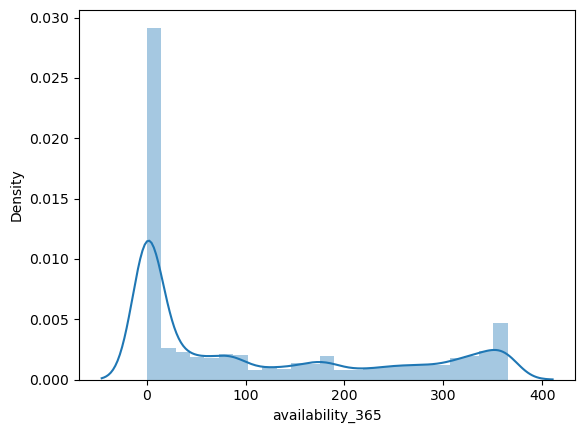

In [141]:
# Extreme values check

sns.distplot(df['availability_365'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [142]:
df['availability_365'].mean() # Check the mean

112.78132733408324

In [143]:
df['availability_365'].median() # Check the mean

45.0

In [144]:
df['availability_365'].max() # Check the mean

365

## STEP 4

### 3. Data prep for regression analysis 

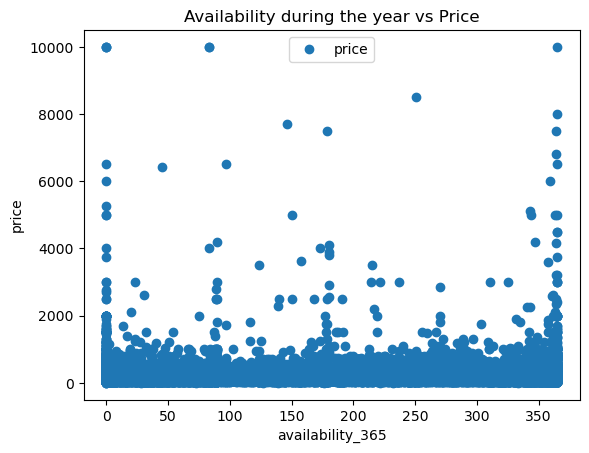

In [145]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'availability_365', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Availability during the year vs Price')  
plt.xlabel('availability_365')  
plt.ylabel('price')  
plt.show()

## STEP 5

## Hypothesis

### If the availability of accomodation term varies, then the prices remain the same.

## STEP 6

In [146]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['availability_365'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [147]:
X

array([[365],
       [355],
       [365],
       ...,
       [ 27],
       [  2],
       [ 23]], dtype=int64)

In [148]:
y

array([[149],
       [225],
       [150],
       ...,
       [115],
       [ 55],
       [ 90]], dtype=int64)

## STEP 7

In [149]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## STEP 8

### 4. Regression analysis

In [150]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [151]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [152]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## STEP 9

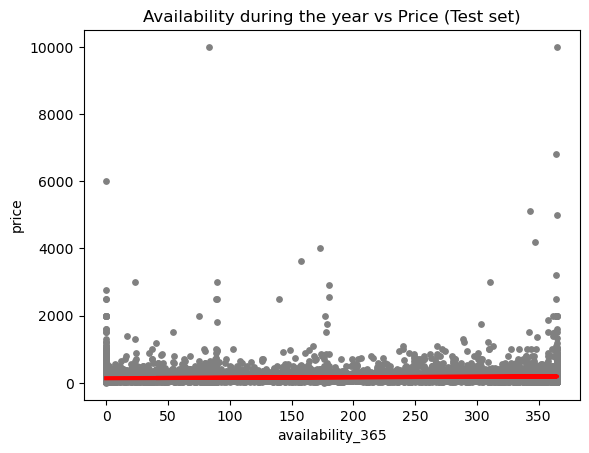

In [153]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Availability during the year vs Price (Test set)')
plot_test.xlabel('availability_365')
plot_test.ylabel('price')
plot_test.show()

## STEP 10

### The linear model represented by the red regression line does not evenly cover all of the data points.  There are many datapoints available upto 1000, a few upto 2000 and very less above 2000 through out the year.

## STEP 11

In [154]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [155]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.14627484]]
Mean squared error:  52706.43046306548
R2 score:  0.007917640377605673


## STEP 12

In [156]:
y_predicted

array([[142.14724097],
       [146.97431066],
       [140.53821775],
       ...,
       [189.10146428],
       [136.29624742],
       [136.00369774]])

In [157]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,225,142.147241
1,649,146.974311
2,300,140.538218
3,26,156.628450
4,125,136.003698
5,49,136.003698
6,100,164.819841
7,175,147.559410
8,85,140.391943
9,70,177.399477


##### Compare how the regression fits the training set

## STEP 13

### The R2 score of 0.0079 which is closer to 0 indicate a poor fit.  Also, there are high variations between the actual and predicted values.

# Set 2 - Variables compared - availability_365 and calculated_host_listings_count

C:\Users\19452\AppData\Local\Temp\ipykernel_33080\3585115697.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['calculated_host_listings_count'], bins=25) # Shows extreme values
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

<Axes: xlabel='calculated_host_listings_count', ylabel='Density'>

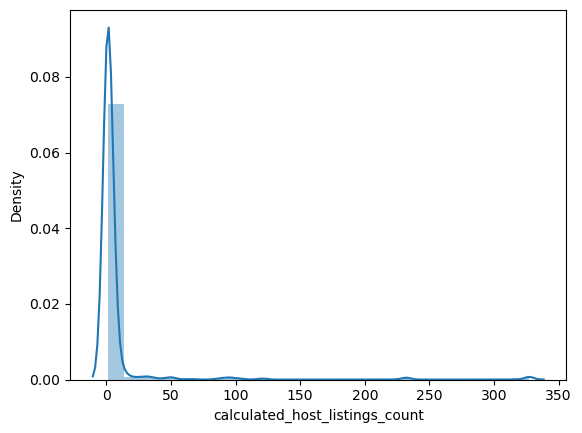

In [158]:
# Extreme values check

sns.distplot(df['calculated_host_listings_count'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [159]:
df['calculated_host_listings_count'].mean() # Check the mean

7.143982002249719

In [160]:
df['calculated_host_listings_count'].median() # Check the mean

1.0

In [161]:
df['calculated_host_listings_count'].max() # Check the mean

327

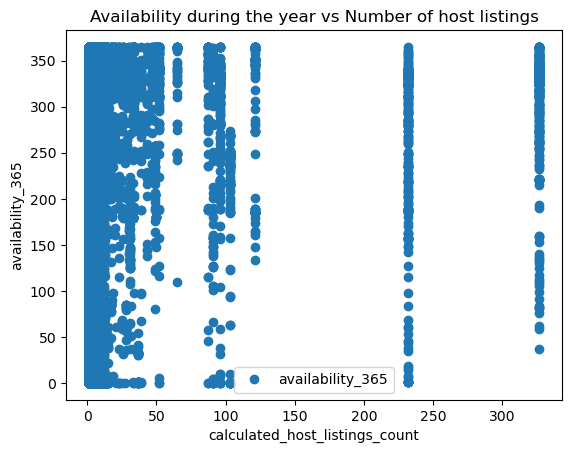

In [162]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'calculated_host_listings_count', y='availability_365',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Availability during the year vs Number of host listings')  
plt.xlabel('calculated_host_listings_count')  
plt.ylabel('availability_365')  
plt.show()

## Hypothesis

### If the host is different, then the listing availability also varies.

In [163]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['calculated_host_listings_count'].values.reshape(-1,1)
y = df['availability_365'].values.reshape(-1,1)

In [164]:
X

array([[6],
       [2],
       [1],
       ...,
       [1],
       [6],
       [1]], dtype=int64)

In [165]:
y

array([[365],
       [355],
       [365],
       ...,
       [ 27],
       [  2],
       [ 23]], dtype=int64)

In [166]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [167]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [168]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [169]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

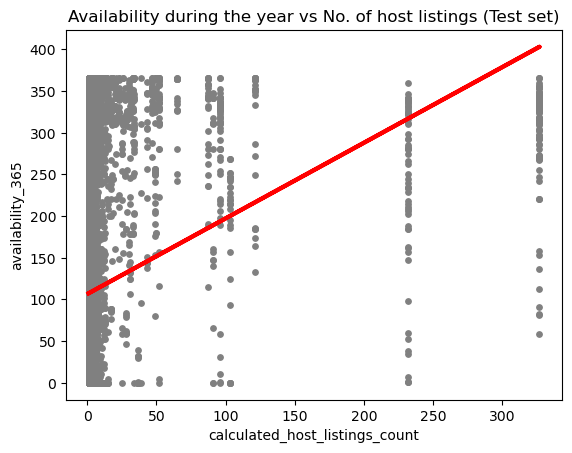

In [170]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Availability during the year vs No. of host listings (Test set)')
plot_test.xlabel('calculated_host_listings_count')
plot_test.ylabel('availability_365')
plot_test.show()

##### The linear model represented by the red regression line does not evenly cover all of the data points.  There are many datapoints available upto 25 days.

In [171]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [172]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.90699231]]
Mean squared error:  16447.173980049687
R2 score:  0.048786063832552684


In [173]:
y_predicted

array([[107.33835207],
       [107.33835207],
       [109.15233668],
       ...,
       [107.33835207],
       [107.33835207],
       [107.33835207]])

In [174]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,42,107.338352
1,75,107.338352
2,31,109.152337
3,141,110.966321
4,0,107.338352
5,0,107.338352
6,197,107.338352
7,79,107.338352
8,30,107.338352
9,283,107.338352


### The R2 score of 0.0487 which is closer to 0 indicate a poor fit.  
### Also, there are high variations between the actual and predicted values.

In [175]:
# check the shape of dataframe

df.shape

(48895, 13)

In [176]:
#export file
df.to_csv(os.path.join(path,'6.3','NewYorkCityAirbnb_Clean.csv'))